In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

In [43]:
%matplotlib inline

In [44]:
#seaborn has few built-in datasets
tips=sns.load_dataset('tips')

In [45]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


C:\Users\djpra\Documents\DS\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_bill'>

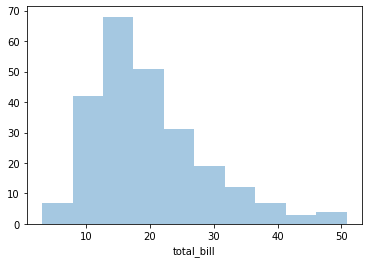

In [46]:
sns.distplot(tips['total_bill'],kde=False,bins=10)
#curve is the kernel distribution etimation #for univariates

In [47]:
#sns.jointplot() allows you to matchup to distplot bivariate data
#basically combines two diff distplots

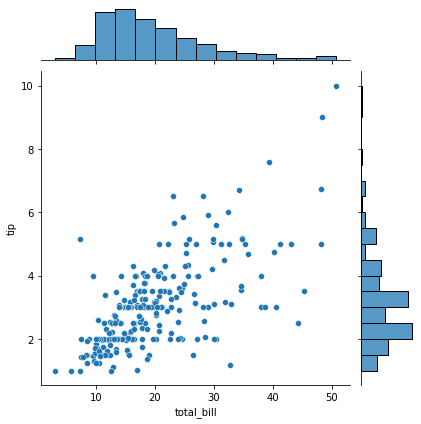

In [48]:
sns.jointplot(x='total_bill',y='tip',data=tips) 
#it is basically a scatter plot and we can choose the kind of plot we want by kind=

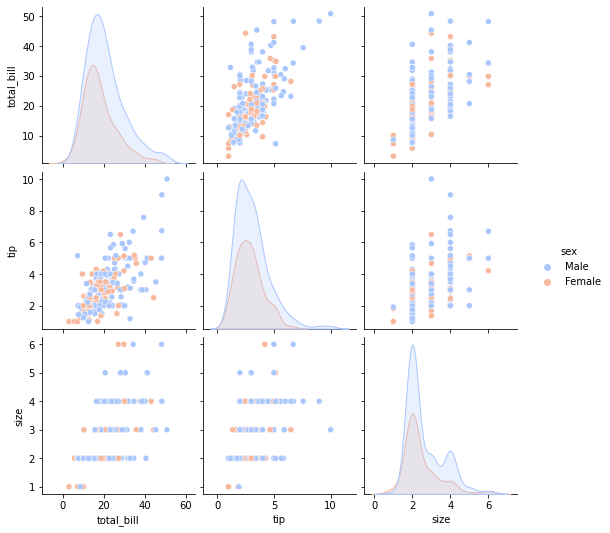

In [49]:
#it gives plots for all numerical combinations #hue for categorical columns
sns.pairplot(tips,hue='sex',palette='coolwarm')

<AxesSubplot:xlabel='total_bill'>

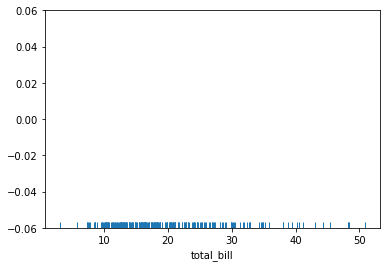

In [50]:

sns.rugplot(tips['total_bill'])

(0.0, 1.0)

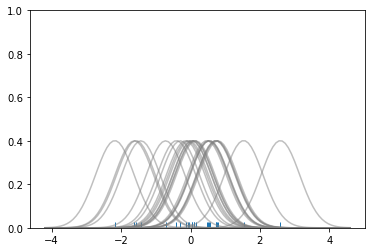

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create dataset
dataset = np.random.randn(25)

# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of the Basis Functions')

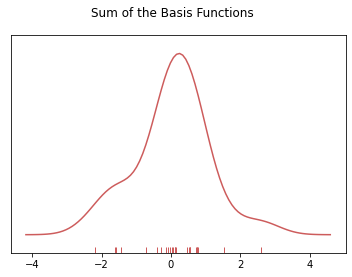

In [52]:
# To get the kde plot we can sum these basis functions.

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

In [53]:
#kde is sum of all the normal distributions around the rugplot

<AxesSubplot:xlabel='total_bill', ylabel='Density'>

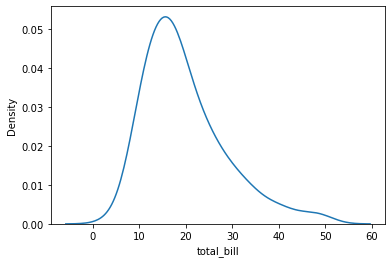

In [54]:
sns.kdeplot(tips['total_bill'])

In [55]:
#Categorical plots
#bar plot is a general plot that allows you to aggregate the categorical data based of somme function
#by default thats the mean

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

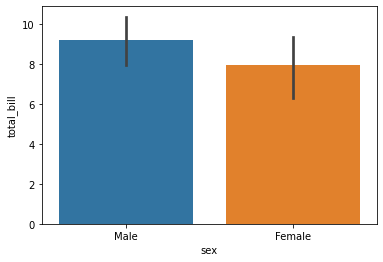

In [56]:
sns.barplot(x='sex',y='total_bill',data=tips,estimator=np.std)

<AxesSubplot:xlabel='sex', ylabel='count'>

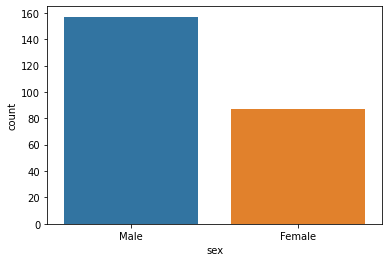

In [57]:
#to count the no of instances, here Y axis is already set to count so just pass x
sns.countplot(x='sex',data=tips)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

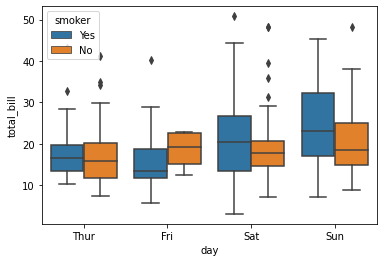

In [58]:
sns.boxplot(x='day',y='total_bill',data=tips,hue='smoker')

<AxesSubplot:xlabel='day', ylabel='total_bill'>

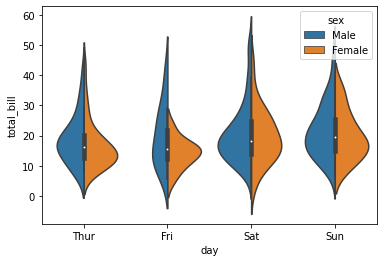

In [59]:
sns.violinplot(x='day',y='total_bill',data=tips,hue='sex',split=True)

C:\Users\djpra\Documents\DS\anaconda\lib\site-packages\seaborn\categorical.py:2802: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='day', ylabel='total_bill'>

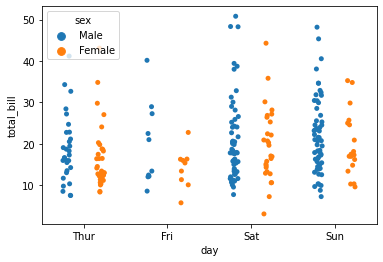

In [60]:
sns.stripplot(x='day',y='total_bill',data=tips,jitter=True,hue='sex',split=True)

In [61]:
#combining strip plot and a violin plot

<AxesSubplot:xlabel='day', ylabel='total_bill'>

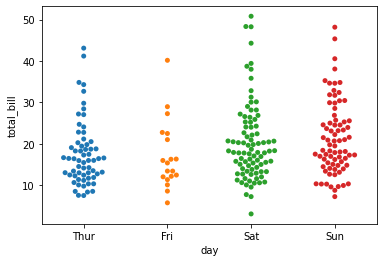

In [62]:
sns.swarmplot(x='day',y='total_bill',data=tips)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

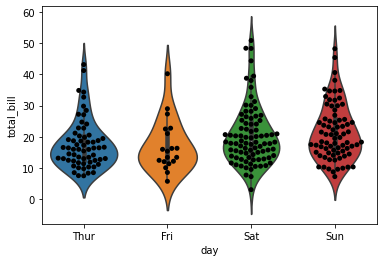

In [63]:
sns.violinplot(x='day',y='total_bill',data=tips)
sns.swarmplot(x='day',y='total_bill',data=tips,color='black')

C:\Users\djpra\Documents\DS\anaconda\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


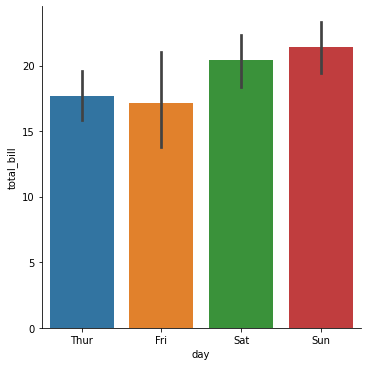

In [64]:
sns.factorplot(x='day',y='total_bill',data=tips,kind='bar')

In [65]:
import seaborn as sns
%matplotlib inline
tips=sns.load_dataset('tips')
flights=sns.load_dataset('flights')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [66]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [67]:
#to convert flights and tips dataset into matrix form
#we need to have labels on both columns and rows

In [68]:
tc=tips.corr()

<AxesSubplot:>

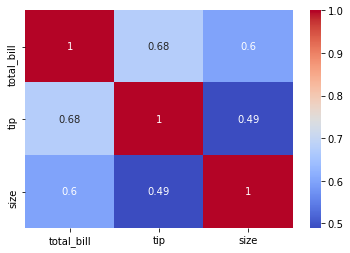

In [69]:
sns.heatmap(tc,annot=True,cmap='coolwarm')

In [70]:
fp=flights.pivot_table(index='month',columns='year',values='passengers')

<AxesSubplot:xlabel='year', ylabel='month'>

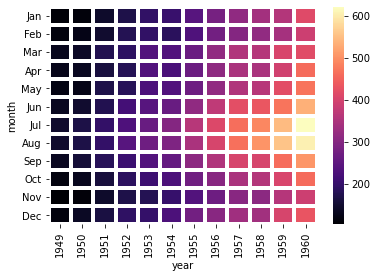

In [71]:
sns.heatmap(fp,cmap='magma',lw=3,linecolor='white')

In [72]:
#cluster map uses hierarchial clustering to produce a clustered version of heatmap

In [73]:
#it tries to cluster rows and columns together based on similarity

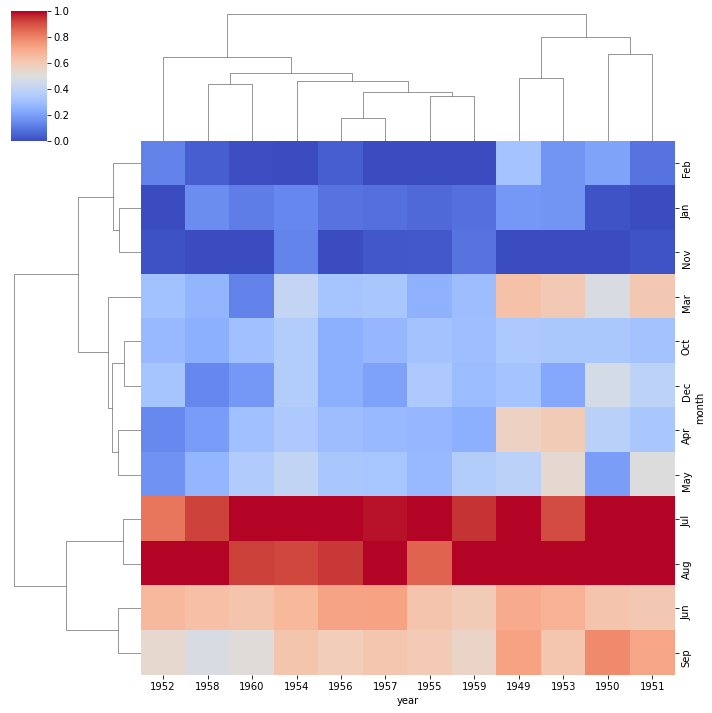

In [74]:
sns.clustermap(fp,cmap='coolwarm',standard_scale=1)

In [75]:
import seaborn as sns
%matplotlib inline
iris=sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [76]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

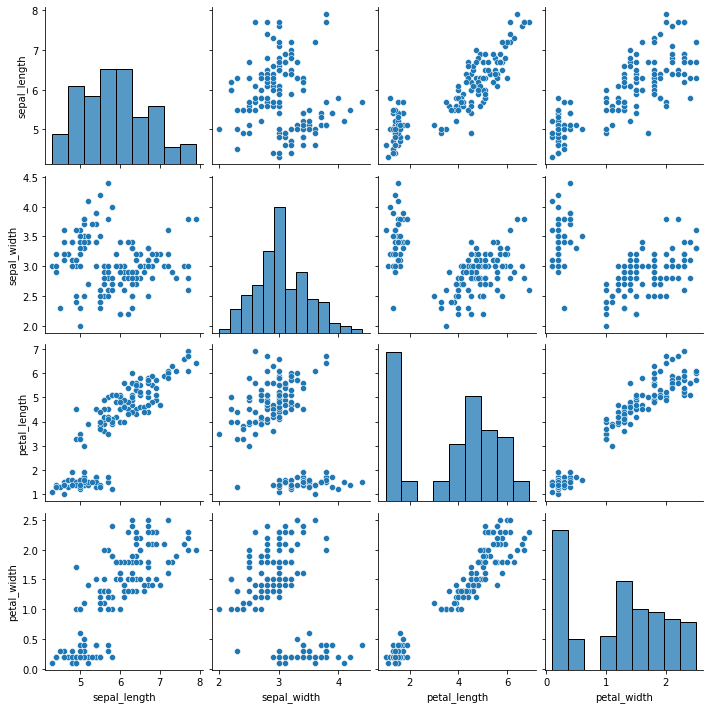

In [77]:
sns.pairplot(iris)

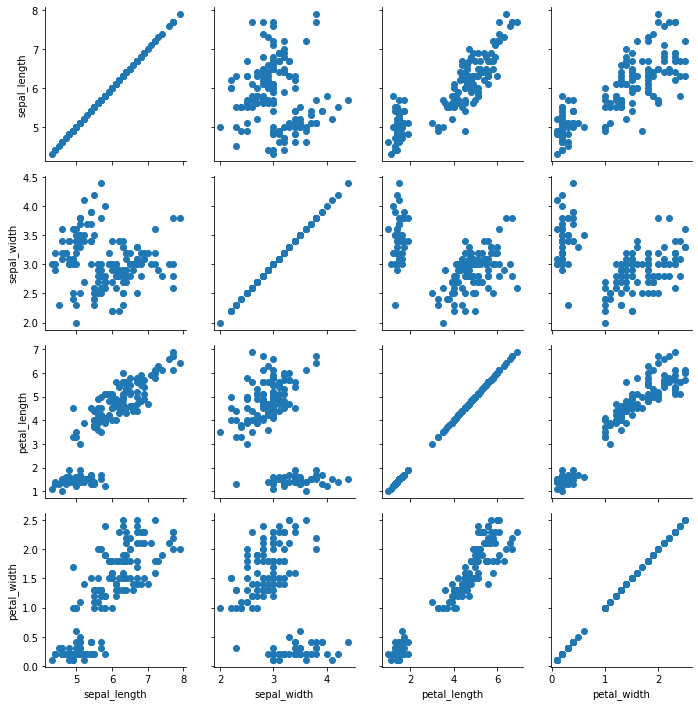

In [78]:
g=sns.PairGrid(iris)
g.map(plt.scatter)

C:\Users\djpra\Documents\DS\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\djpra\Documents\DS\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\djpra\Documents\DS\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar fle

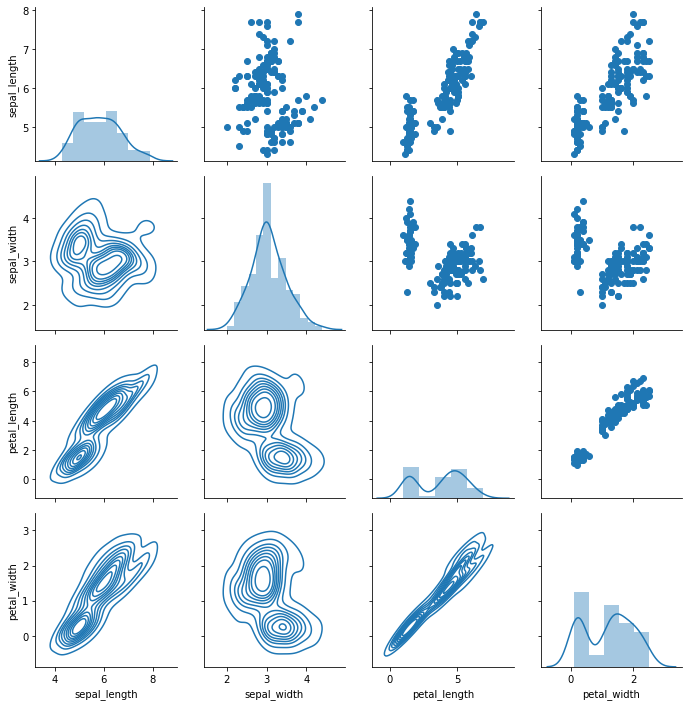

In [84]:
g=sns.PairGrid(iris)
g.map_diag(sns.distplot)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

In [86]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


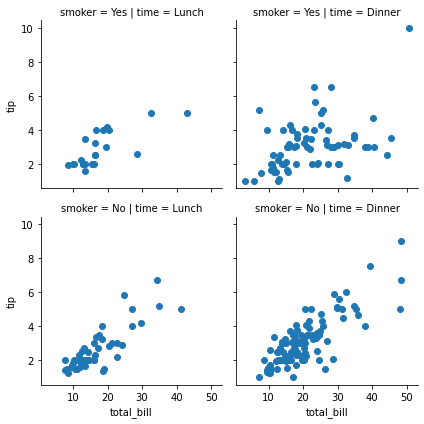

In [90]:
g=sns.FacetGrid(data=tips,col='time',row='smoker')
g.map(plt.scatter,'total_bill','tip')

In [92]:
#Regression plots
# LM plots allows to display linear models with seaborn

In [93]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


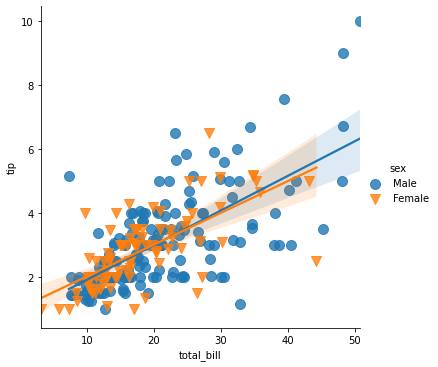

In [99]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',markers=['o','v'],
           scatter_kws={'s':100})

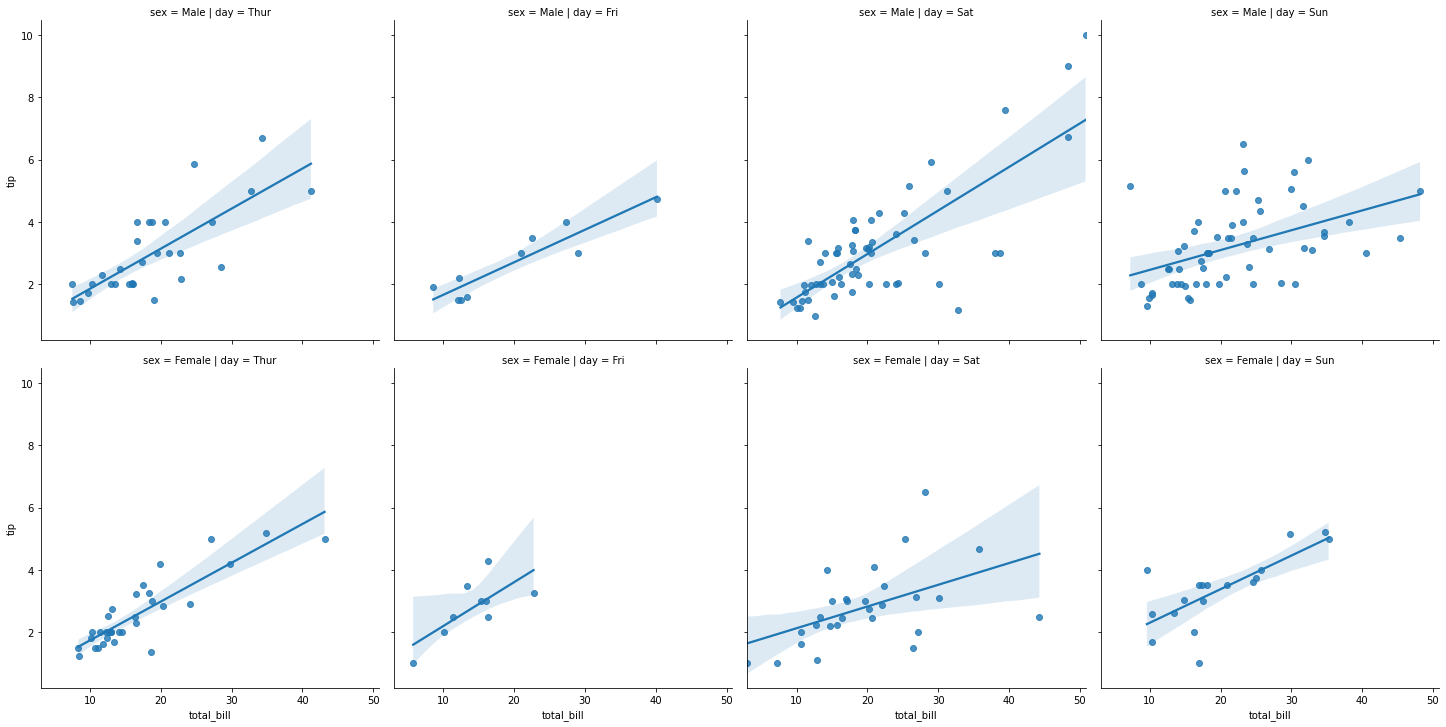

In [102]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='day',row='sex')

C:\Users\djpra\Documents\DS\anaconda\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


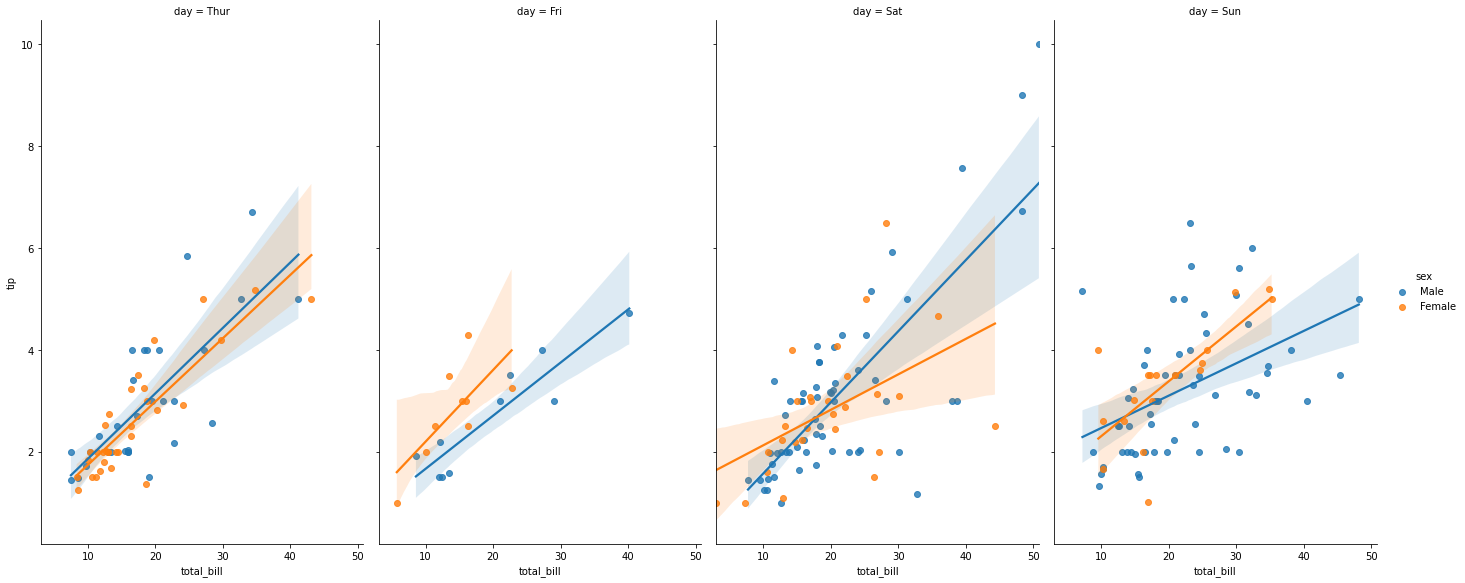

In [106]:
#aspect ratio is ratio between height and the width
sns.lmplot(x='total_bill',y='tip',data=tips,col='day',hue='sex',aspect=0.6,size=8)

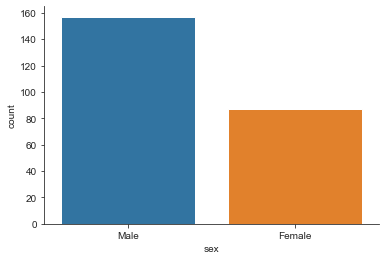

In [108]:
sns.set_style('ticks')
sns.countplot(x='sex',data=tips)
sns.despine()

<AxesSubplot:xlabel='sex', ylabel='count'>

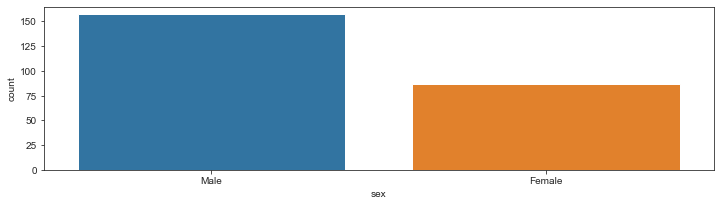

In [109]:
plt.figure(figsize=(12,3))
sns.countplot(x='sex',data=tips)

<AxesSubplot:xlabel='sex', ylabel='count'>

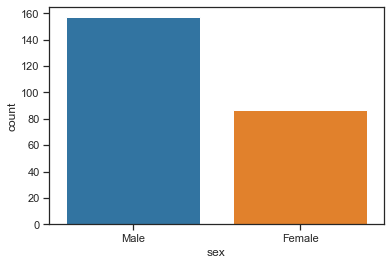

In [120]:
sns.set_context('notebook')
sns.countplot(x='sex',data=tips)

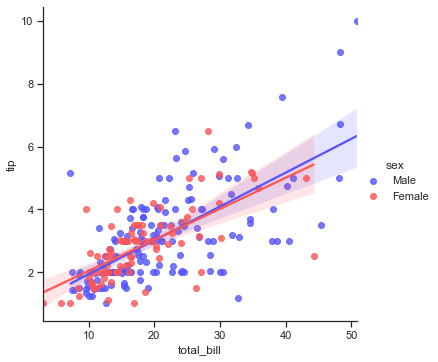

In [121]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',palette='seismic')